<a href="https://colab.research.google.com/github/Rishitha541/AIML-2303A52149/blob/main/AIML_Lab_011.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = '/content/drug200.csv'
data = pd.read_csv(file_path)

# Encode categorical variables
label_encoders = {}
for col in ['Sex', 'BP', 'Cholesterol', 'Drug']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define features (X) and target (y)
X = data.drop('Drug', axis=1)
y = data['Drug']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train[['Age', 'Na_to_K']] = scaler.fit_transform(X_train[['Age', 'Na_to_K']])
X_test[['Age', 'Na_to_K']] = scaler.transform(X_test[['Age', 'Na_to_K']])

# Initialize and train the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=label_encoders['Drug'].classes_)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

       DrugY       0.88      0.93      0.90        15
       drugA       0.86      1.00      0.92         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      0.20      0.33         5
       drugX       0.77      0.91      0.83        11

    accuracy                           0.85        40
   macro avg       0.90      0.81      0.80        40
weighted avg       0.87      0.85      0.82        40



In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = '/content/drug200.csv'
data = pd.read_csv(file_path)

# Encode categorical variables
label_encoders = {}
for col in ['Sex', 'BP', 'Cholesterol', 'Drug']:  # Include 'Drug' in encoding
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define features (X) and target (y)
X = data.drop('Na_to_K', axis=1)  # Using all other columns to predict 'Na_to_K'
y = data['Na_to_K']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features in X
# Include 'Drug' column in scaling as it's now numerical
scaler = StandardScaler()
numerical_features = ['Age', 'Drug']  # Add 'Drug' here
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])


# Initialize and train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions
y_pred = lin_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 19.795368287444173
R-squared: 0.6054539443927675


   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        15
       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



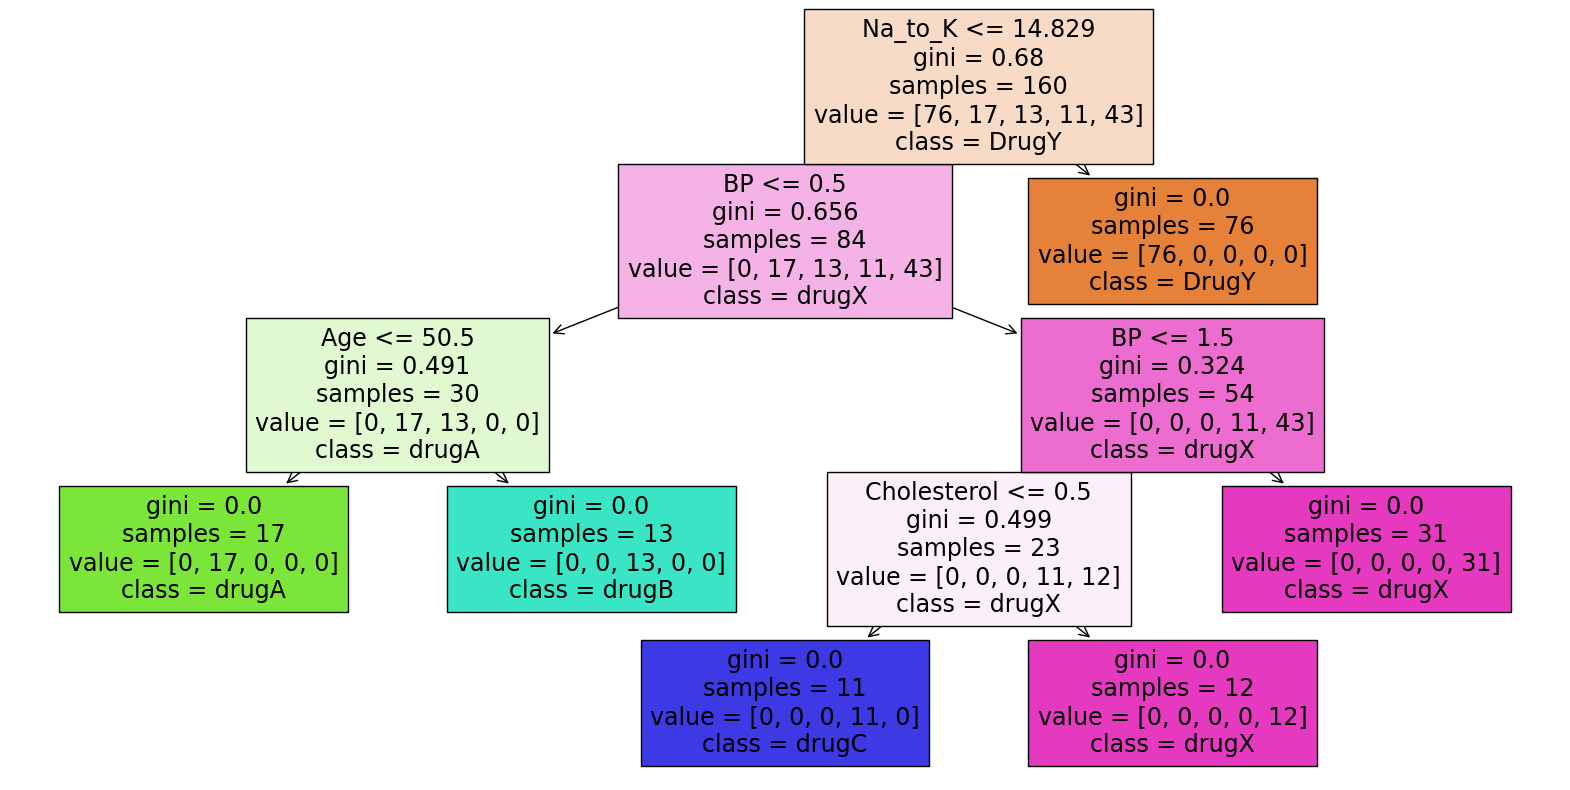

In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Load the data
data = pd.read_csv('/content/drug200.csv')

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Create a LabelEncoder for categorical columns
for col in ['Sex', 'BP', 'Cholesterol']: # Applying encoding for 'Sex', 'BP', and 'Cholesterol'
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])  # Convert to numerical

# Separate features (X) and target variable (y)
X = data.drop(columns=['Drug'])  # Assuming 'Drug' is the target column
y = data['Drug']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualize the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True)
plt.show()

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = '/content/drug200.csv'
data = pd.read_csv(file_path)

# Encode categorical variables
label_encoders = {}
for col in ['Sex', 'BP', 'Cholesterol', 'Drug']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define features (X) and target (y)
X = data.drop('Drug', axis=1)
y = data['Drug']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train[['Age', 'Na_to_K']] = scaler.fit_transform(X_train[['Age', 'Na_to_K']])
X_test[['Age', 'Na_to_K']] = scaler.transform(X_test[['Age', 'Na_to_K']])

# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=label_encoders['Drug'].classes_)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9
Classification Report:
               precision    recall  f1-score   support

       DrugY       0.94      1.00      0.97        15
       drugA       1.00      1.00      1.00         6
       drugB       0.75      1.00      0.86         3
       drugC       1.00      0.40      0.57         5
       drugX       0.83      0.91      0.87        11

    accuracy                           0.90        40
   macro avg       0.90      0.86      0.85        40
weighted avg       0.91      0.90      0.89        40

